In [10]:
%load_ext autoreload
%autoreload 2

from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import nibabel as nib
from glob import glob
#my関数
import myctvis
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## データのpathをDataFremeにする

In [11]:
df = myctvis.get_df_all()

## NifTIデータをNumpy Arrayとしてロードする

In [12]:
sample_path = df["FilePathImage"].iloc[0]
data = myctvis.load_nifti(sample_path)
#メモリきついためデータ削減
data = data[:,:,:20]

## マスクデータをRGBにする

In [40]:
p = df["FilePathMask"][0]
seg_data = myctvis.load_nifti(p)
#メモリきついためデータ削減
seg_data = seg_data[:,:,:20]
mask_color = myctvis.label_color(seg_data)


## CTデータをhuからグレイスケールに変換する

In [14]:
gray_volume = myctvis.hu_to_gray(data)

## CT画像とアノテーションのoverlay

In [20]:
overlayed.shape

(630, 630, 20, 3)

In [42]:
mask_filter = np.greater(seg_data,0)
mask_filter = np.stack([mask_filter, mask_filter, mask_filter],axis=-1)

In [45]:
overlayed = np.where(mask_filter, gray_volume*0.7 + mask_color*0.3, gray_volume).astype(np.uint8) 

In [52]:
overlayed = overlay(gray_volume,mask_filter,mask_color,0.5)

ValueError: operands could not be broadcast together with shapes (630,630,20,3,3) (630,630,20,3) (630,630,20,3) 

In [51]:
def overlay(gray_volume, mask_volume, mask_color, alpha=0.3):
    mask_filter = np.greater(mask_volume,0)
    mask_filter = np.stack([mask_filter, mask_filter, mask_filter],axis=-1)
    overlayed = np.where(mask_filter, gray_volume*(1-alpha) + mask_color*alpha, gray_volume).astype(np.uint8) 
    
    return overlayed

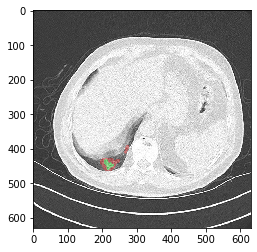

In [46]:
plt.imshow(overlayed[:,:,10])